In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
pd.options.mode.chained_assignment = None
import glob

In [2]:
path = 'C:/Users/20175848/Documents/waterschap-datachallenge/data/den bosch/sewer_data_db/data_wwtp_flow/'
all_files = glob.glob(path + '/*.csv')
data = pd.DataFrame()
for filename in all_files:
    temp = pd.read_csv(filename)
    data = pd.concat([data, temp], sort = False)
    
data = data.reset_index()
data = data.drop(['index'], axis = 1)
data = data.drop('Unnamed: 0', axis = 1)

In [12]:
data['datumBeginMeting'] = pd.to_datetime(data['datumBeginMeting'])
data = data[data['historianKwaliteit'] == 100]
data.head()


,datumBeginMeting,datumEindeMeting,datumMonster,historianEenheid,historianKwaliteit,historianTagnummer,hstWaarde
0,2018-01-06 23:59:00,2018-01-07 00:00:00,NaN,m3/h,100.0,DB.1876FT03BCMS,452.0
1,2018-01-06 23:58:00,2018-01-06 23:59:00,NaN,m3/h,100.0,DB.1876FT03BCMS,474.0
2,2018-01-06 23:57:00,2018-01-06 23:58:00,NaN,m3/h,100.0,DB.1876FT03BCMS,506.0
3,2018-01-06 23:56:00,2018-01-06 23:57:00,NaN,m3/h,100.0,DB.1876FT03BCMS,538.0
4,2018-01-06 23:55:00,2018-01-06 23:56:00,NaN,m3/h,100.0,DB.1876FT03BCMS,567.0


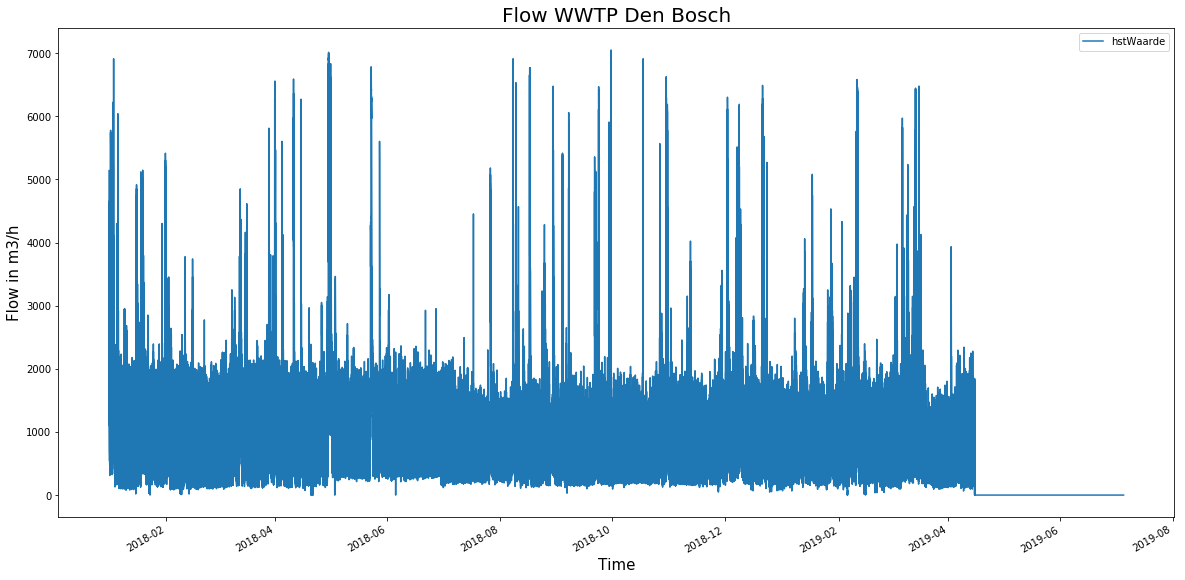

In [17]:
ax = data.plot(x = 'datumBeginMeting', y = 'hstWaarde', figsize = (20,10))
ax.set_xlabel('Time', size = 15)
ax.set_ylabel('Flow in m3/h', size = 15)
ax.set_title('Flow WWTP Den Bosch', size = 20);
fig = ax.get_figure()
fig.savefig('{}/fig4.jpg'.format(path))